In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Reading the Republican candidates csv file

Rep_df = pd.read_csv("../Data/rep_candidates.csv", encoding='latin-1')

#Rep_df.head()

In [13]:
Rep_df = Rep_df[['Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']]

# Missing Values

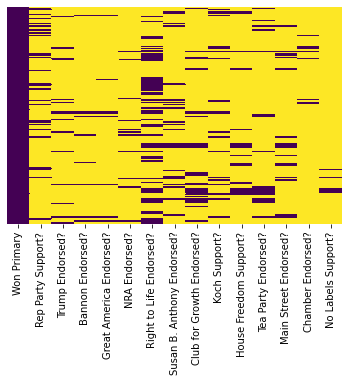

In [15]:
# Remove

Rep_df = Rep_df.dropna(axis=0, subset=['Won Primary'])

# Missing pattern in Risk Drivers

ax1 = sns.heatmap(Rep_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

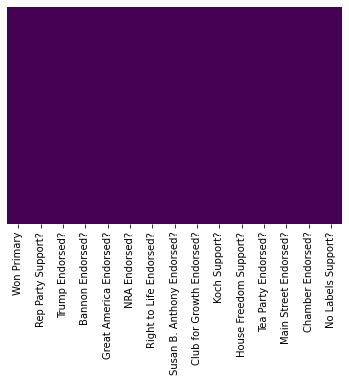

In [16]:
Rep_df2 = Rep_df.fillna('NaN')

ax2 = sns.heatmap(Rep_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualize Risk Drivers

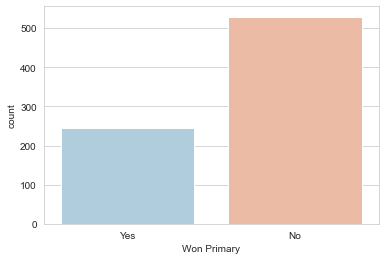

In [18]:
# Won:Loss count in the data

sns.set_style('whitegrid')

win_loss = sns.countplot(x='Won Primary',data=Rep_df2,palette='RdBu_r')

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

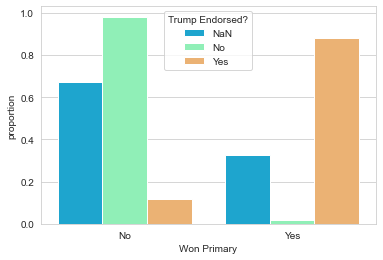

In [19]:
# Proprtion of Win:Loss based on Trup Endorsement

df = Rep_df2
x, y, hue = "Won Primary", "proportion", "Trump Endorsed?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

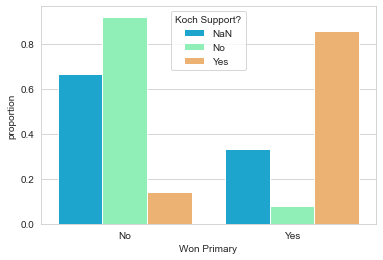

In [20]:
# Proprtion of Win:Loss based on Koch  Endorsement

df = Rep_df2
x, y, hue = "Won Primary", "proportion", "Koch Support?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

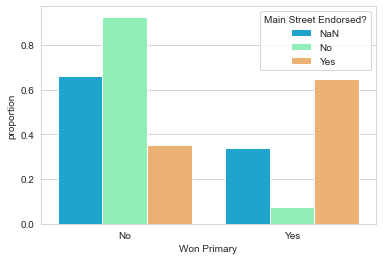

In [21]:
# Proprtion of Win:Loss based on 

df = Rep_df2
x, y, hue = "Won Primary", "proportion", "Main Street Endorsed?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

# Dummy variable codeing 

In [23]:
# Retain only relevant columns

Rep_df3 = Rep_df2[['Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']]

X_cat = pd.get_dummies(Rep_df3[['Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']], drop_first=True)


X = X_cat

In [24]:
X.head()

,Rep Party Support?_No,Rep Party Support?_Yes,Trump Endorsed?_No,Trump Endorsed?_Yes,Bannon Endorsed?_No,Bannon Endorsed?_Yes,Great America Endorsed?_No,Great America Endorsed?_Yes,NRA Endorsed?_No,NRA Endorsed?_Yes,...,House Freedom Support?_No,House Freedom Support?_Yes,Tea Party Endorsed?_No,Tea Party Endorsed?_Yes,Main Street Endorsed?_No,Main Street Endorsed?_Yes,Chamber Endorsed?_No,Chamber Endorsed?_Yes,No Labels Support?_No,No Labels Support?_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train - Test Split

In [27]:
from sklearn.model_selection import train_test_split

y = Rep_df3['Won Primary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
y_train.value_counts()

No     366
Yes    175
Name: Won Primary, dtype: int64

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=101)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [30]:
X.columns

Index(['Rep Party Support?_No', 'Rep Party Support?_Yes', 'Trump Endorsed?_No',
       'Trump Endorsed?_Yes', 'Bannon Endorsed?_No', 'Bannon Endorsed?_Yes',
       'Great America Endorsed?_No', 'Great America Endorsed?_Yes',
       'NRA Endorsed?_No', 'NRA Endorsed?_Yes', 'Right to Life Endorsed?_No',
       'Right to Life Endorsed?_Yes', 'Susan B. Anthony Endorsed?_No',
       'Susan B. Anthony Endorsed?_Yes', 'Club for Growth Endorsed?_No',
       'Club for Growth Endorsed?_Yes', 'Koch Support?_No',
       'Koch Support?_Yes', 'House Freedom Support?_No',
       'House Freedom Support?_Yes', 'Tea Party Endorsed?_No',
       'Tea Party Endorsed?_Yes', 'Main Street Endorsed?_No',
       'Main Street Endorsed?_Yes', 'Chamber Endorsed?_No',
       'Chamber Endorsed?_Yes', 'No Labels Support?_No',
       'No Labels Support?_Yes'],
      dtype='object')

# Tree Visualization

In [32]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = ['Rep Party Support?_No', 'Rep Party Support?_Yes', 'Trump Endorsed?_No',
       'Trump Endorsed?_Yes', 'Bannon Endorsed?_No', 'Bannon Endorsed?_Yes',
       'Great America Endorsed?_No', 'Great America Endorsed?_Yes',
       'NRA Endorsed?_No', 'NRA Endorsed?_Yes', 'Right to Life Endorsed?_No',
       'Right to Life Endorsed?_Yes', 'Susan B. Anthony Endorsed?_No',
       'Susan B. Anthony Endorsed?_Yes', 'Club for Growth Endorsed?_No',
       'Club for Growth Endorsed?_Yes', 'Koch Support?_No',
       'Koch Support?_Yes', 'House Freedom Support?_No',
       'House Freedom Support?_Yes', 'Tea Party Endorsed?_No',
       'Tea Party Endorsed?_Yes', 'Main Street Endorsed?_No',
       'Main Street Endorsed?_Yes', 'Chamber Endorsed?_No',
       'Chamber Endorsed?_Yes', 'No Labels Support?_No',
       'No Labels Support?_Yes']

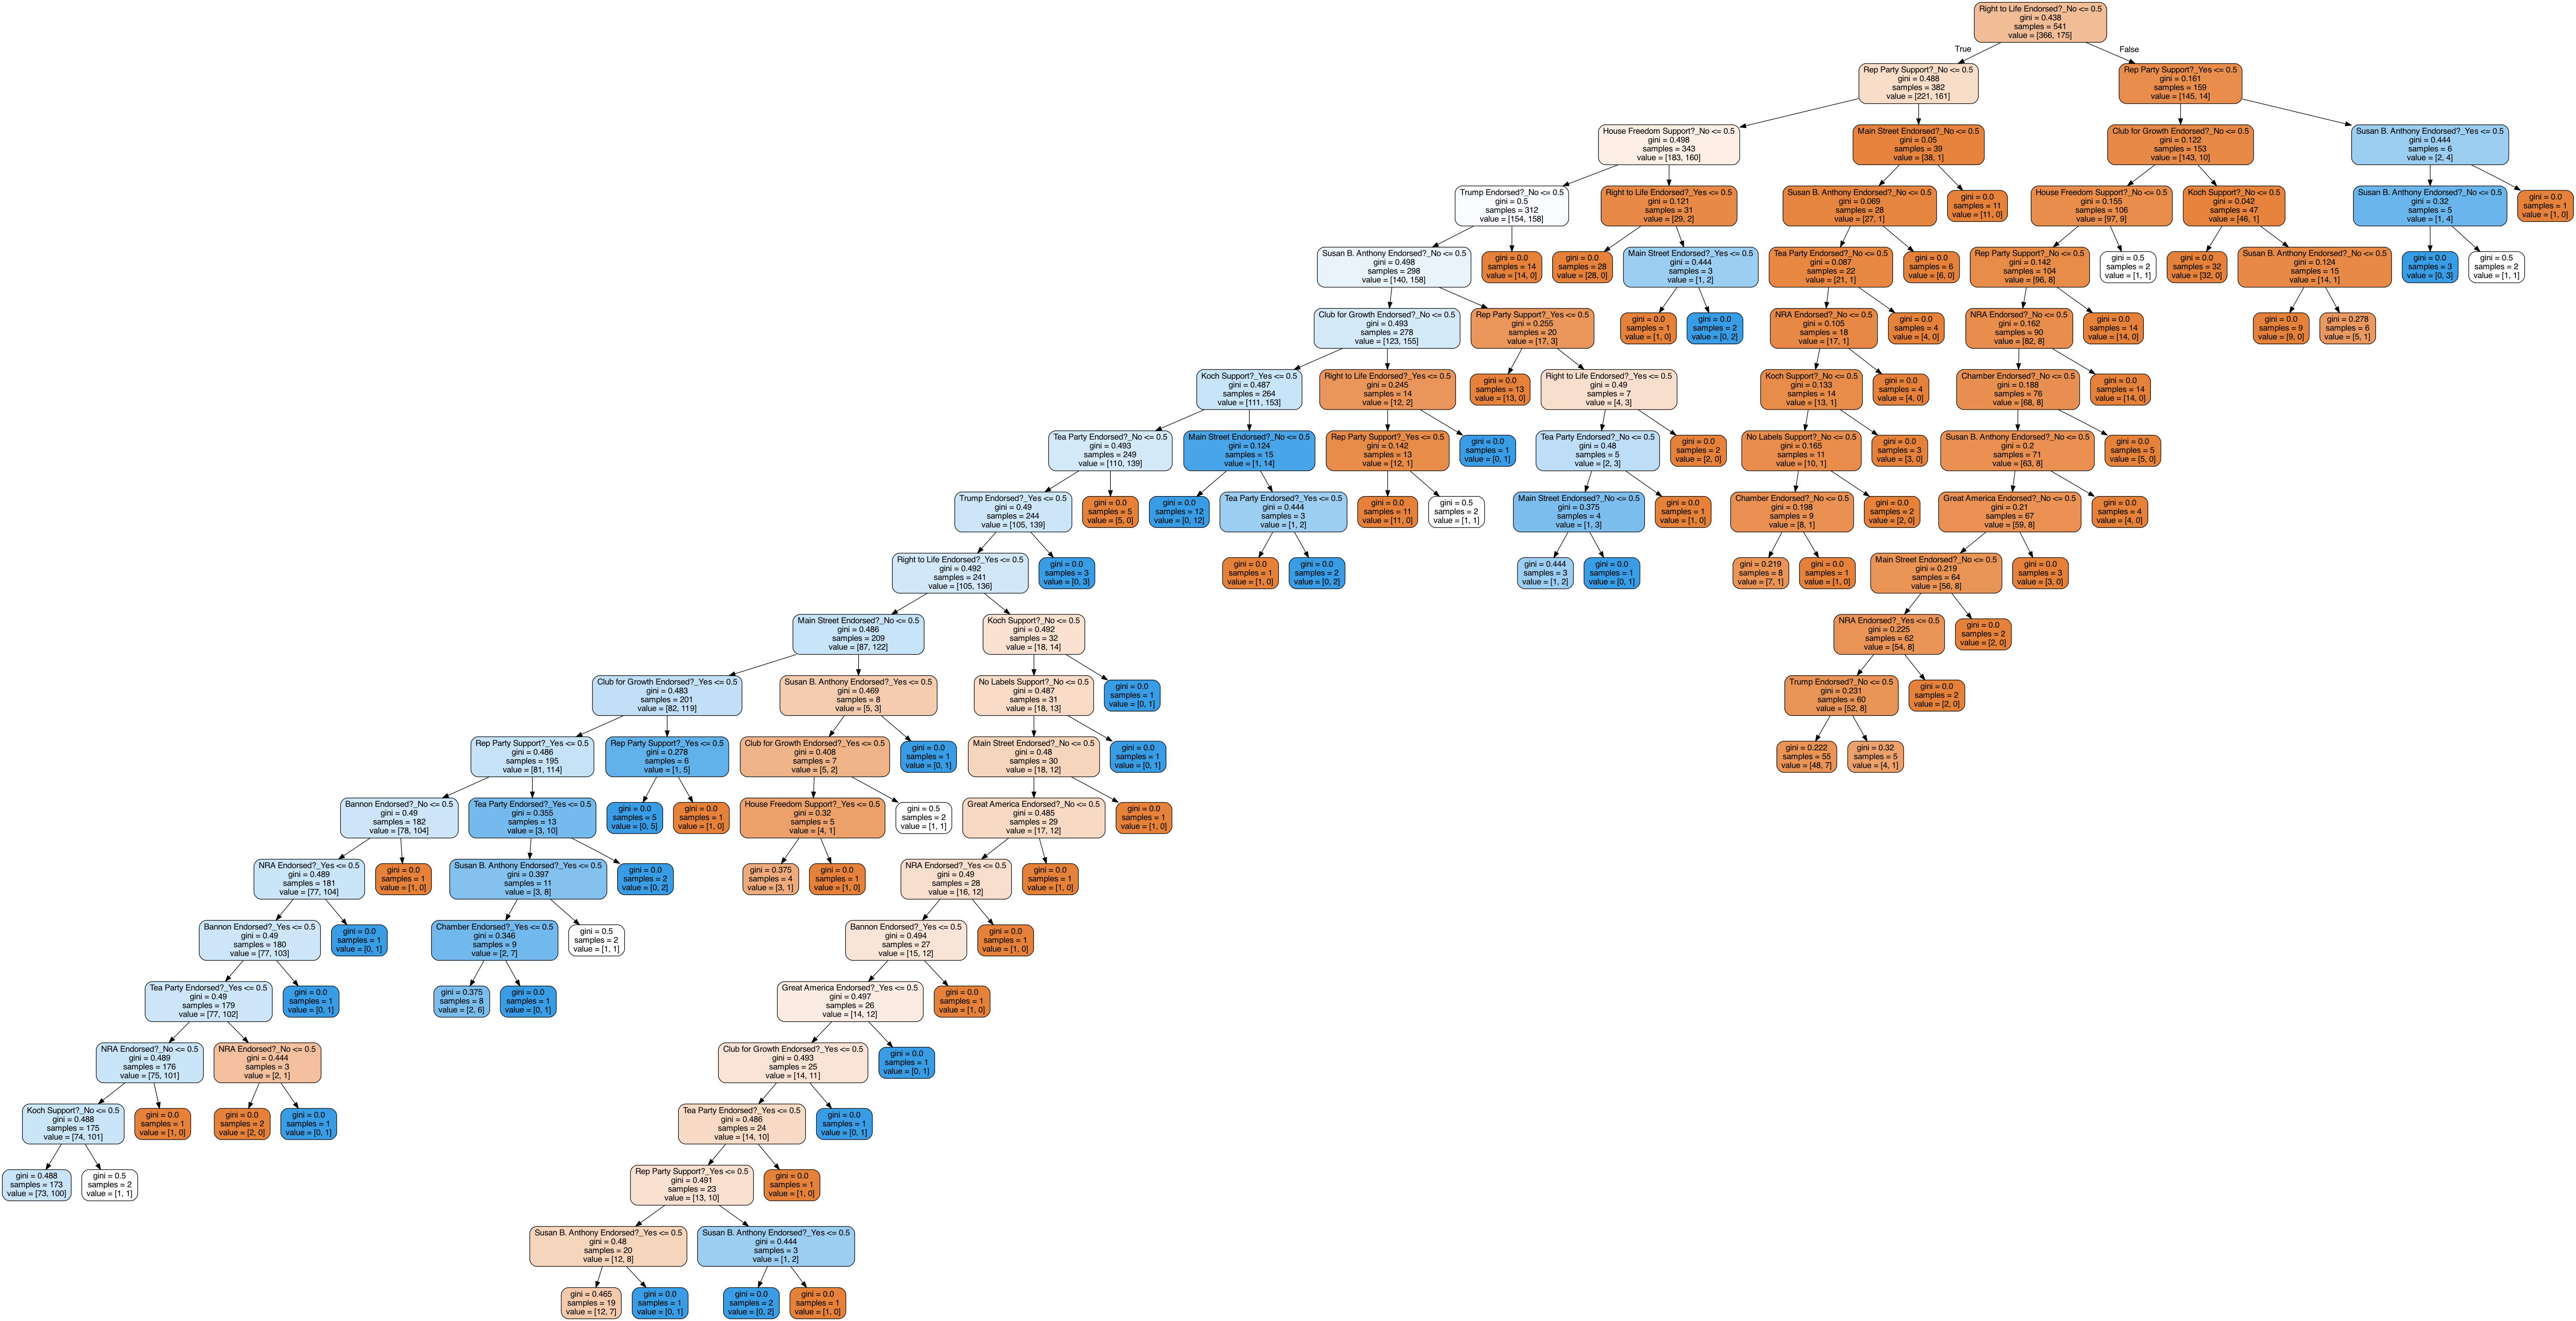

In [33]:
dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png()) 

# Prune Decision Tree using Grid Search

In [36]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 20)), 'max_depth': list(range(2,10)), 'min_samples_leaf' : [30], 'criterion':['gini','entropy']}

In [37]:
dtree2 = GridSearchCV(DecisionTreeClassifier(random_state=101), params, verbose=1, cv=3)

dtree2.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:    3.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [30], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

## Best Parameters from Grid Search

In [38]:
dtree2.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': 2,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 30,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 101,
 'splitter': 'best'}

In [64]:
dtree3 = DecisionTreeClassifier(random_state=101, max_depth =  3, min_samples_leaf = 30, min_samples_split = 2, criterion =  'gini')


dtree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

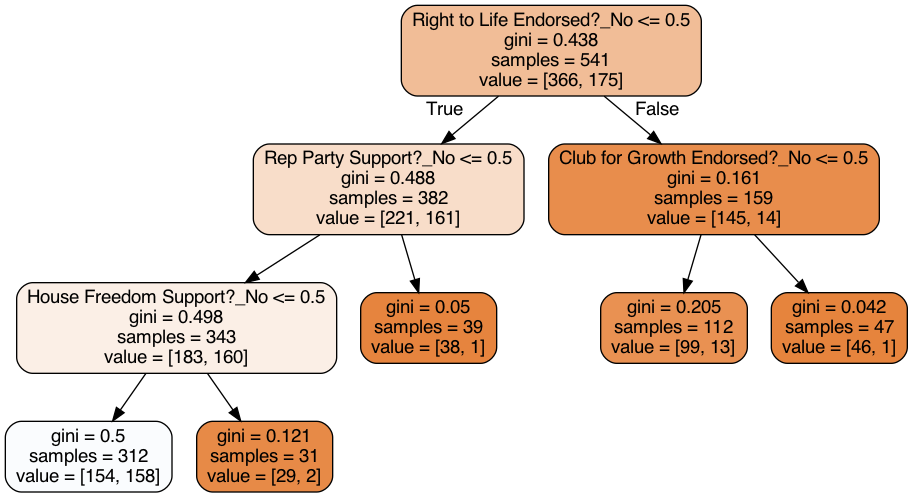

In [65]:
dot_data = StringIO()  

export_graphviz(dtree3, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png()) 

# Prediction and Evaluation 

In [66]:
predictions = dtree3.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.88      0.50      0.64       163
         Yes       0.42      0.84      0.56        70

   micro avg       0.61      0.61      0.61       233
   macro avg       0.65      0.67      0.60       233
weighted avg       0.74      0.61      0.62       233



In [67]:
#tn, fp, fn, tp

print(confusion_matrix(y_test,predictions))

[[82 81]
 [11 59]]


In [68]:
y_test.value_counts()

No     163
Yes     70
Name: Won Primary, dtype: int64

# The model has 12% lift over random selection